# Assignment: Evaluating Data from a Form

A client has been testing a [small form](index.html) to gather some basic data about their client-base. They have brought their findings to you to validate the data they have gathered. You can open the `index.html` page in a browser to take a look at the form.

You have been provided a [dataset of csv records](../../data/form.csv) that contain entries from the form as well as some basic visualizations.The client pointed out that some of the visualizations look incorrect but they're unsure about how to resolve them. You can explore it in the [assignment notebook](assignment.ipynb).

## Instructions

Use the techniques in this lesson to make recommendations about the form so it captures accurate and consistent information. 

In [ ]:
!pip install pandas
!pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#Loading the dataset
path = '../../data/form.csv'
form_df = pd.read_csv(path)
print(form_df)

  birth_month       state   pet
0     January         NaN  Cats
1         JAN          CA  Cats
2        Sept      Hawaii   Dog
3     january          AK   Dog
4        July          RI  Cats
5   September  California  Cats
6       April          CA   Dog
7     January  California  Cats
8    November          FL   Dog
9    December     Florida  Cats


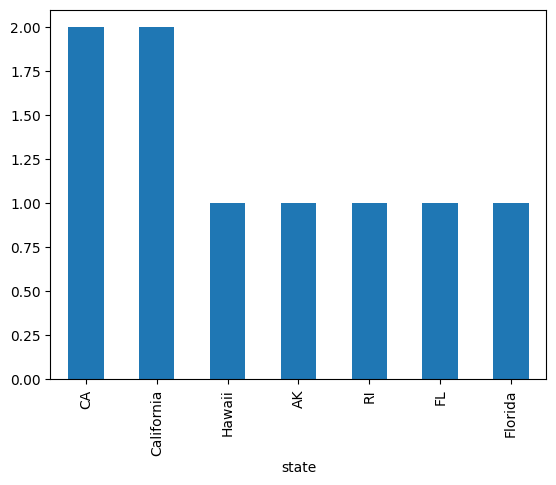

In [3]:
form_df['state'].value_counts().plot(kind='bar');
plt.show()

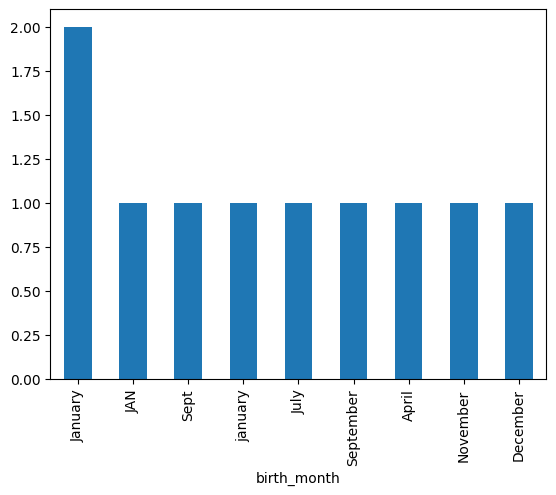

In [4]:
form_df['birth_month'].value_counts().plot(kind='bar');
plt.show()

# Taking a closer look at the data
With the data visualizations making it available for us to notice the inconsistiencies of each column. We will look at each column and try to make it consistent one by one.

## Analyzing the column birth_month
Lets take a closer look at the column birth_month

In [14]:
form_df['birth_month'] 

0      January
1          JAN
2         Sept
3      january
4         July
5    September
6        April
7      January
8     November
9     December
Name: birth_month, dtype: object

In [12]:
pd.unique(form_df['birth_month'])

array(['January', 'JAN', 'Sept', 'january', 'July', 'September', 'April',
       'November', 'December'], dtype=object)

In [20]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
new_form_df = form_df
for month in months:
    new_form_df= new_form_df.drop(new_form_df[new_form_df['birth_month'] == month].index)

print(new_form_df)

  birth_month   state   pet
1         JAN      CA  Cats
2        Sept  Hawaii   Dog
3     january      AK   Dog


In the result shown above, we can see that there are 4 different naming that references January : January, JAN, january, and january(which is mispelled). Similarly, we have 2 naming that references September: Sept and September.

To have a consistent naming convention, we will use Pascal case for the month names.

In [24]:
diff_naming_january = ["JAN", "january"]
for month in diff_naming_january:
    form_df['birth_month'] = form_df['birth_month'].replace(month, "January")

#for september
form_df['birth_month'] = form_df['birth_month'].replace("Sept", "September")
print(form_df)

  birth_month       state   pet
0     January         NaN  Cats
1     January          CA  Cats
2   September      Hawaii   Dog
3     January          AK   Dog
4        July          RI  Cats
5   September  California  Cats
6       April          CA   Dog
7     January  California  Cats
8    November          FL   Dog
9    December     Florida  Cats


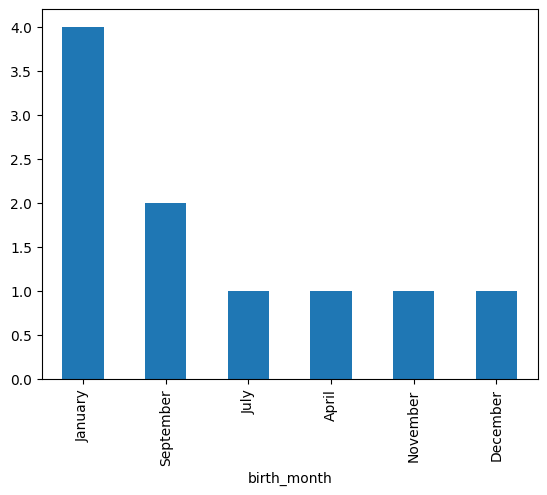

In [25]:
form_df['birth_month'].value_counts().plot(kind='bar');
plt.show()

Now, we have a birth_month column that is consistent!

## Analyzing the state column
In the state column, we can observe that there is a NaN value. Furthermore, the naming convention is not consistent, as we have states that are spelled completely while the others are spelled in a two-letter code.

### Addressing the NaN value for a state
Removing the row in which there is a NaN value seems like a rush move. We should consider if the state column is that important than the other two columns. We can leave the data type as is since we cant take the mean of the column as it is of string type, we can do a fill, using the state with the highest number of count, or we can completely drop the row.
Our approach will be filling it with the state with the highest number of count.
However, we still need to make the other data in the column consistent in naming convention

### Addressing the Inconsistent Naming Convention
We will use a completely spelled out name rather than the two-letter code, as it brings more benefit such as understanding what that state is (what does RI mean?)


In [26]:
pd.unique(form_df['state'])

array([nan, 'CA', 'Hawaii', 'AK', 'RI', 'California', 'FL', 'Florida'],
      dtype=object)

Here, we have CA, AK, RI, and FL, which stands for California, Alaska, Rhode Island, and Florida, respectively.

  birth_month         state   pet
0     January           NaN  Cats
1     January    California  Cats
2   September        Hawaii   Dog
3     January        Alaska   Dog
4        July  Rhode Island  Cats
5   September    California  Cats
6       April    California   Dog
7     January    California  Cats
8    November       Florida   Dog
9    December       Florida  Cats


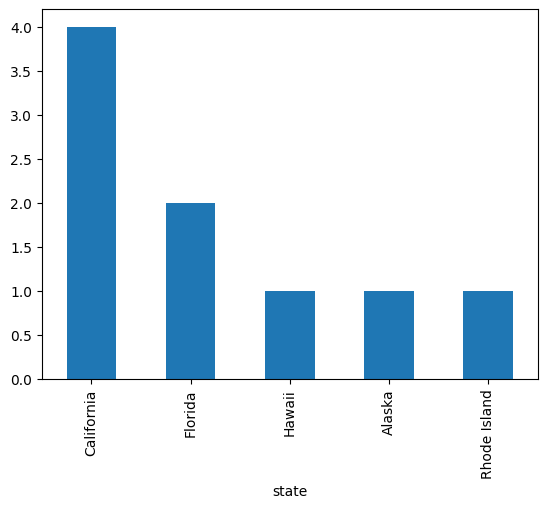

In [28]:
change_name = {'CA': 'California', 'Hawaii': 'Hawaii', 'AK': 'Alaska', 'RI': 'Rhode Island', 'California': 'California', 'FL': 'Florida'}

form_df['state'] = form_df['state'].replace(change_name)
print(form_df)
form_df['state'].value_counts().plot(kind='bar');
plt.show()

In [32]:
# Use the state with the highest number of count to fill the NaN value.
highest_count = form_df['state'].value_counts().idxmax() #should be California

form_df['state'] = form_df['state'].fillna(highest_count)
form_df

,birth_month,state,pet
0,January,California,Cats
1,January,California,Cats
2,September,Hawaii,Dog
3,January,Alaska,Dog
4,July,Rhode Island,Cats
5,September,California,Cats
6,April,California,Dog
7,January,California,Cats
8,November,Florida,Dog
9,December,Florida,Cats


In [33]:
pd.unique(form_df['pet'])

array(['Cats', 'Dog'], dtype=object)

### Pet Column
As we can see, for the pet column is consistent in naming convention and doesn't have any NaN value.